In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
with open("../tracker_stubs/ball_detections.pkl", "rb") as f:
    ball_positions = pickle.load(f)

In [5]:
ball_positions=[x.get(1,[]) for x in ball_positions]
df_ball_positions=pd.DataFrame(ball_positions,columns=["x1","y1","x2","y2"])
df_ball_positions=df_ball_positions.interpolate(method="linear")
df_ball_positions=df_ball_positions.bfill()

In [7]:
df_ball_positions["mid_y"]=(df_ball_positions["y1"]+df_ball_positions["y2"])/2
df_ball_positions["mid_y_rolling_mean"]=df_ball_positions["mid_y"].rolling(window=5,min_periods=1,center=False).mean()

In [8]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean
0,895.013855,615.194763,912.229797,632.967102,624.080933,624.080933
1,895.013855,615.194763,912.229797,632.967102,624.080933,624.080933
2,877.954651,631.202362,896.236084,650.781097,640.991730,629.717865
3,860.895447,647.209961,880.242371,668.595093,657.902527,636.764030
4,847.586365,660.940531,865.777649,680.618673,670.779602,643.567145
...,...,...,...,...,...,...
209,1233.585571,741.442383,1246.004883,753.956909,747.699646,728.928456
210,1233.471191,741.149780,1246.104248,754.081787,747.615784,741.280266
211,1233.500366,741.151428,1245.904297,753.886597,747.519012,747.489093
212,1233.129639,740.996338,1245.485107,753.604614,747.300476,747.530585


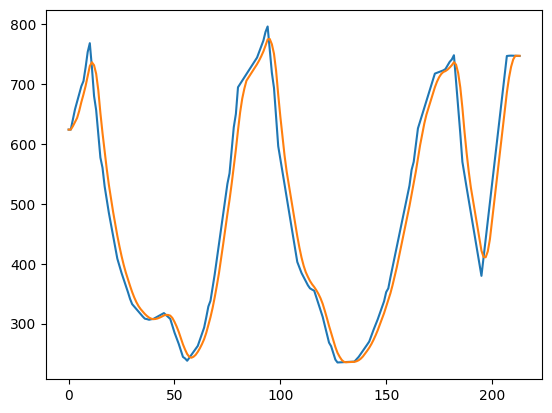

In [11]:
plt.plot(df_ball_positions["mid_y"],label="mid_y")
plt.plot(df_ball_positions["mid_y_rolling_mean"],label="mid_y_rolling_mean")

In [10]:
df_ball_positions["delta_y"]=df_ball_positions["mid_y_rolling_mean"].diff()

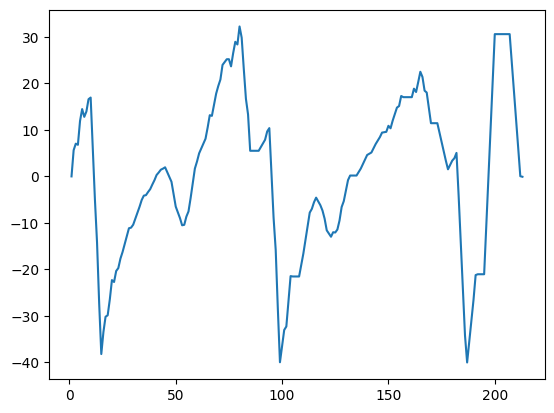

In [12]:
plt.plot(df_ball_positions["delta_y"],label="delta_y")

In [31]:



df_ball_positions["ball_hit"]=0
minimum_change_frames_for_hit=25
#Parcourir les positions de la balle
for i in range(1,len(df_ball_positions)-int(minimum_change_frames_for_hit*1.2)):
    # Si la balle change de direction
    negative_position_change=df_ball_positions["delta_y"].iloc[i]>0 and df_ball_positions["delta_y"].iloc[i+1]<0
    positive_position_change=df_ball_positions["delta_y"].iloc[i]<0 and df_ball_positions["delta_y"].iloc[i+1]>0
    if negative_position_change or positive_position_change:
        change_count=0 #Represente le nombre de frames (max 25) ou la balle continue dans sa direction
        # Parcourir les frames suivantes
        for change_frame in range(i+1,i+int(minimum_change_frames_for_hit*1.2)+1):

            # Tant que la balle continue dans la meme direction
            negative_position_change_following_frame=df_ball_positions["delta_y"].iloc[i]>0 and df_ball_positions["delta_y"].iloc[change_frame]<0
            positive_position_change_following_frame=df_ball_positions["delta_y"].iloc[i]<0 and df_ball_positions["delta_y"].iloc[change_frame]>0
            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>=minimum_change_frames_for_hit-1:
            df_ball_positions["ball_hit"].iloc[i]=1
frame_nums_ball_hits=df_ball_positions[df_ball_positions["ball_hit"]==1].index.tolist()
#Le but de l'algo est de vérifier que la balle continue dans la meme direction pendant au moins 25 frames
#Dans ce cas, on considère que la balle a été frappée
#Sinon on considère que la balle n'a pas été frappée et on continue

C:\Users\aaron\AppData\Local\Temp\ipykernel_16336\3157363530.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions["ball_hit"].iloc[i]=1
C:\Users\aaron\AppData\Local\Temp\ipykernel_16336\3157363530.py:22: SettingWithCopyWarn

In [32]:
df_ball_positions[df_ball_positions["ball_hit"]==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,777.697510,717.184814,796.941406,738.274170,727.729492,736.583539,6.239148,1
58,925.488611,241.277838,938.334485,254.123773,247.700806,242.809378,-1.481329,1
95,623.538757,748.427063,641.576782,767.019897,757.723480,775.551379,0.757819,1
131,716.175812,228.773865,729.044312,242.482552,235.628208,235.258604,-0.799416,1


In [33]:
df_ball_positions[df_ball_positions["ball_hit"]==1].index.tolist()

[11, 58, 95, 131]